UNIVERSIDAD GALILEO

SL II

Marco Vinicio Escalante Lara

Carné: **19001148**


# Backpropagation

In [146]:
import numpy as np
import matplotlib.pyplot as plt

## Definimos nuestro set de entrenamiento y parametros

In [128]:
# Las posibles combinaciones de xor
x_entreno = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]]).T
y_entreno = np.array([0., 1., 1., 0.]).reshape(-1, 1).T

# Parametros inicializados aleatoriamente
capa1 = np.random.normal(scale=0.2, size=(3, 3))
capa2 = np.random.normal(scale=0.2, size=(2, 4))
salida = np.random.normal(scale=0.2, size=(1, 3))

## Definimos nuestra función de costos (MSE)

In [169]:
def f_costo(x, y, capa1, capa2, salida):
    # Tamaño de muestra a usar
    size = x.T.shape[0]
    # Calculamos el error, por lo que debemos calcular la salida de nuestra función y restar con el dato real
    c_1 = np.matmul(capa1, np.vstack((np.ones(x.shape[1]), x)))
    n_1 = np.maximum(c_1, 0.)
    c_2 = np.matmul(capa2, np.vstack((np.ones(n_1.shape[1]), n_1)))
    n_2 = np.maximum(c_2, 0.)
    s_1 = np.matmul(salida, np.vstack((np.ones(n_2.shape[1]), n_2)))
    # Calulo del error, entre lo real y lo calculado
    dif = s_1.T - y.T
    
    # Determinamos la funcion de costos
    Costo = 0.5*np.mean(np.power(dif, 2))
    
    # Iniciamos los gradiantes en un valor igual a cero para que se vayan computando 
    g1 = np.zeros_like(capa1)
    g2 = np.zeros_like(capa2)
    g3 = np.zeros_like(salida)
    
    c = x.T
    d = y.T
    yi = 0.
    # Calculamos el Backpropagation en cada uno de los valores que tenemos
    for i in range(size):
        xi = c[i, :].reshape(-1, 1)
        yi = d[i].reshape(-1,1)
        # Definimos el forward propagation para poder determinar el error
        n1 = np.vstack((np.ones(xi.shape[1]), xi))
        c1 = np.matmul(capa1, n1)
        n2 = np.maximum(c1, 0.)
        n2 = np.vstack((np.ones(n2.shape[1]), n2))
        c2 = np.matmul(capa2, n2)
        n3 = np.maximum(c2, 0.)
        n3 = np.vstack((np.ones(n3.shape[1]), n3))
        s1 = np.matmul(salida, n3)
        # Determinas el error en cada una de las capas
        error_s = s1 - yi
        error_2 = np.matmul(salida.T[1:], error_s) #* (s1 > 0).astype(np.float)
        error_1 = np.matmul(capa2.T[1:, :], error_2) 
        
        # Recalculamos los gradientes en base a los valores obtenidos
        g3 += np.matmul(error_s, n3.T)
        g2 += np.matmul(error_2, n2.T)
        g1 += np.matmul(error_1, n1.T)

    
    capa1_grad = g1/size
    capa2_grad = g2/size
    salida_grad = g3/size

    return Costo, capa1_grad, capa2_grad, salida_grad


In [170]:
f_costo(x_entreno, y_entreno, capa1, capa2, salida)

(0.15620944942423262, array([[ 0.01362129,  0.00679317,  0.00680082],
        [-0.00618319, -0.00308366, -0.00308713],
        [-0.00422718, -0.00210817, -0.00211054]]), array([[0.01763162, 0.0030073 , 0.00649473, 0.        ],
        [0.03586667, 0.00611753, 0.01321173, 0.        ]]), array([[-0.24983666, -0.04434773,  0.        ]]))

In [171]:
def red_entreno(x, y, capa1, capa2, salida, rep, lr, mostrar):
    
    # Repetir hasta la iteracion puesta
    for a in range(1, rep+1):
        costo, capa1_g, capa2_g, salida_g = f_costo(x, y, capa1, capa2, salida)
        # Mostrar los resultados divisibles entre los datos a mostrar
        if (a % mostrar == 0):
            print("Iteración: %d" % a) 
            print("Costo: %f" %  costo)
        
        # Actualizar los pesos sinápticos
        capa1 += -lr * capa1_g
        capa2 += -lr * capa2_g
        salida += -lr * salida_g

    return capa1, capa2, salida

In [145]:
capa1_entr, capa2_entr, salida_entr = red_entreno(x_entreno, y_entreno, capa1, capa2, salida, 300, 0.001, 50)

Iteración: 50
Costo: 0.177633
Iteración: 100
Costo: 0.172419
Iteración: 150
Costo: 0.167726
Iteración: 200
Costo: 0.163502
Iteración: 250
Costo: 0.159699
Iteración: 300
Costo: 0.156274


## Grafica de salida

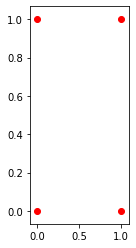

In [179]:
c_1 = np.matmul(capa1_entr, np.vstack((np.ones(x_entreno.shape[1]), x_entreno)))
n_1 = np.maximum(c_1, 0.)
c_2 = np.matmul(capa2_entr, np.vstack((np.ones(n_1.shape[1]), n_1)))
n_2 = np.maximum(c_2, 0.)
s_1 = np.matmul(salida_entr, np.vstack((np.ones(n_2.shape[1]), n_2)))
    
x1 = x_entreno[0]
x2 = x_entreno[1]
plt.subplot(1,3,1)
f = np.abs(s_1[0].T-1) < 0.5
nf = np.logical_not(f)
plt.scatter(x1[f.T], x2[f.T], color='b')
plt.scatter(x1[nf.T], x2[nf.T], color='r')

## CONCLUSIONES

No se puede apreciar el cambio esperado con el operador logico xor, sino que solo muestra un tipo de salida, cuando lo adecuado hubiera sido mostrar todos los posibles resultados correctos, tal vez podría deberse a como trabajamos las funciones de activación o que al final no requeriera una función de activación.